# Fraud  Loan Prediction 

With the loan dataset verify that the person is eligible for loan or will he get rejected..

Importing the required libraries as shown below

Data Analysing 

Data Visualization

Exploratory data analysis (EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('load.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Dataset Description

Loan_ID - Unique Loan ID

Gender - Male/ Female

Married- Applicant married (Y/N)

Dependents - Number of dependents

Education - Applicant Education (Graduate/ Under Graduate)

Self_Employed - Self employed (Y/N)

ApplicantIncome - Applicant income

CoapplicantIncome - Coapplicant income

LoanAmount - Loan amount in thousands

Loan_Amount_Term - Term of loan in months

Credit_History - credit history meets guidelines

Property_Area - Urban/ Semi Urban/ Rural

Loan_Status - Loan approved (Y/N)

In [4]:
#these are the dataset columns

data.columns 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#these are the data types of columns

data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#Finding the null values and data types of the datset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#Finding the null value in the dataset  

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Finding the un-unique values in each and every column

data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Data Visualization

Univariate visualization

Male      489
Female    112
Name: Gender, dtype: int64


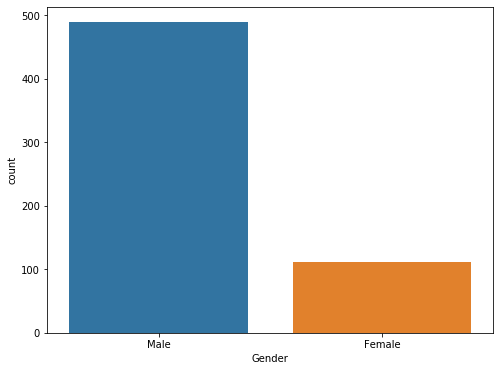

In [9]:
plt.figure(figsize=(8,6))
print(data['Gender'].value_counts())
sb.countplot(data['Gender'])

Yes    398
No     213
Name: Married, dtype: int64


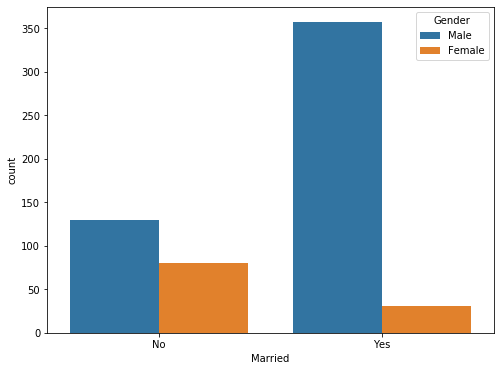

In [10]:
plt.figure(figsize=(8,6))
print(data['Married'].value_counts())
sb.countplot(x=data['Married'],hue=data['Gender'])

Bivariate plot 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


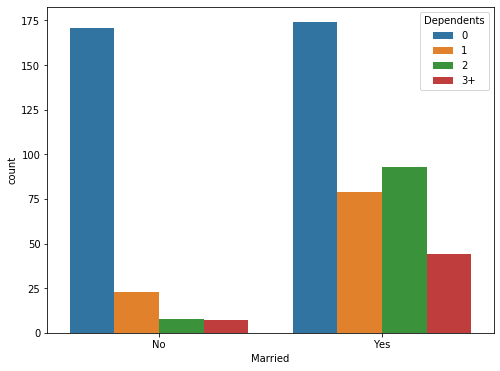

In [11]:
plt.figure(figsize=(8,6))
print(data['Dependents'].value_counts())
sb.countplot(x=data['Married'],hue=data['Dependents'])

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


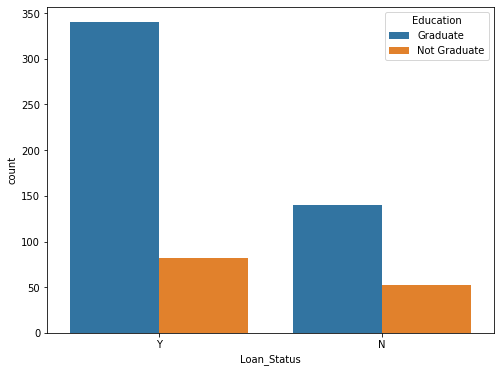

In [12]:
plt.figure(figsize=(8,6))
print(data['Education'].value_counts())
sb.countplot(x=data['Loan_Status'],hue=data['Education'])

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


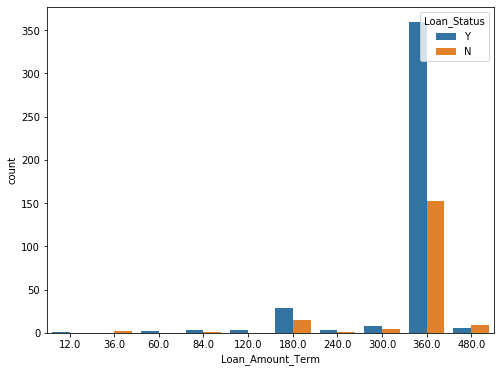

In [13]:
plt.figure(figsize=(8,6))
print(data['Loan_Amount_Term'].value_counts())
sb.countplot(x=data['Loan_Amount_Term'],hue=data['Loan_Status'])

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64


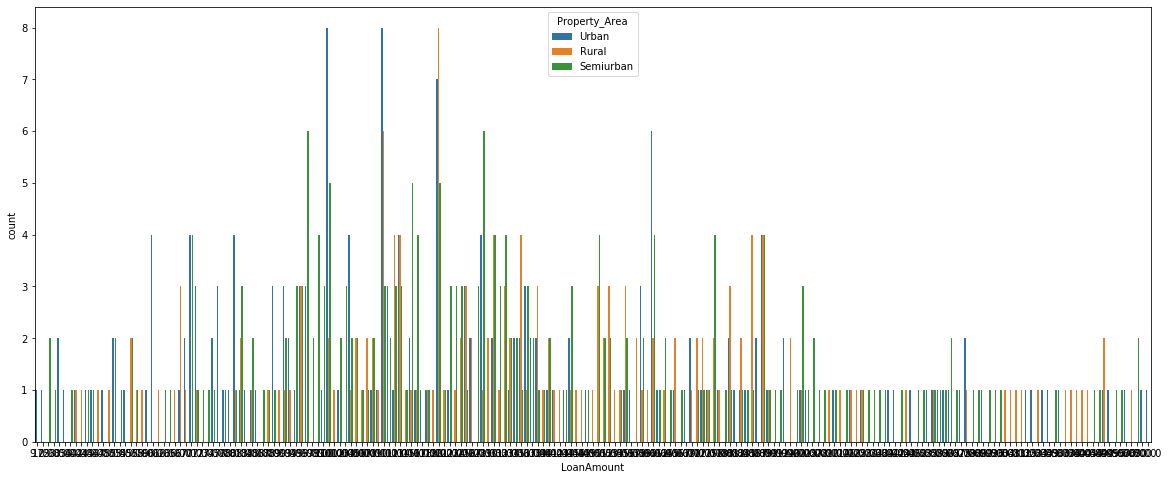

In [14]:
plt.figure(figsize=(20,8))
print(data['LoanAmount'].value_counts())
sb.countplot(x=data['LoanAmount'],hue=data['Property_Area'])

Droping the rows which contains nan value 

In [9]:
data=data.dropna()
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [13]:
# LabelEncoder is used to convert categorical data into numerical data

le=LabelEncoder()
data[col]=data[col].apply(lambda x:le.fit_transform(x))
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [14]:
#Getting the data information after removing the nan rows 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int32  
 2   Married            480 non-null    int32  
 3   Dependents         480 non-null    int32  
 4   Education          480 non-null    int32  
 5   Self_Employed      480 non-null    int32  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int32  
 12  Loan_Status        480 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 39.4+ KB


Bivariate plot

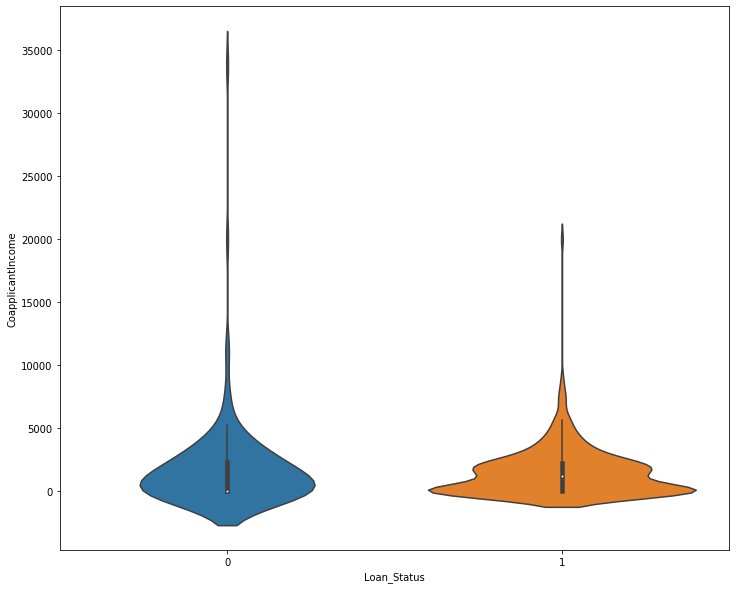

In [15]:
plt.figure(figsize=(12,10))
sb.violinplot(x='Loan_Status',y='CoapplicantIncome',data=data)

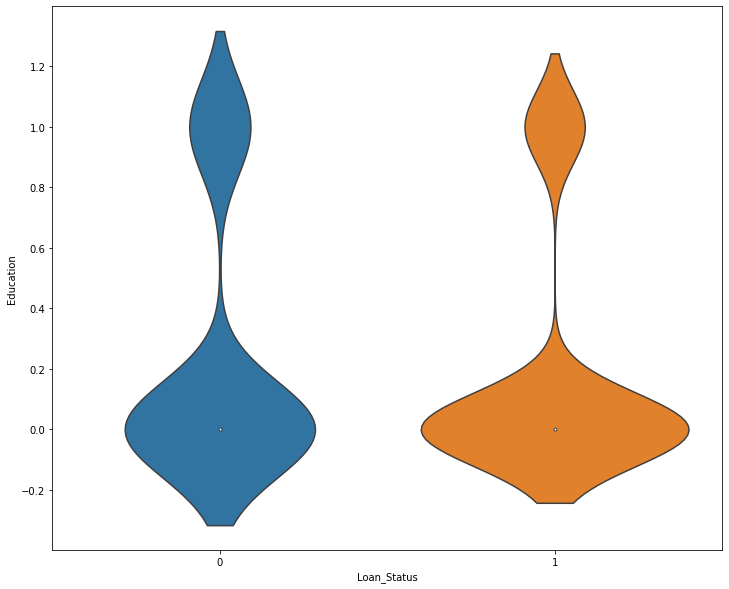

In [16]:
plt.figure(figsize=(12,10))
sb.violinplot(x='Loan_Status',y='Education',data=data)

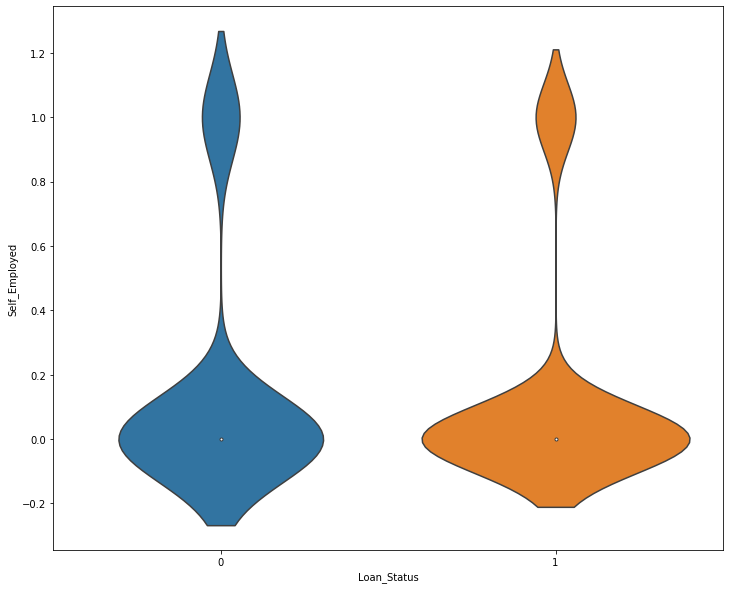

In [17]:
plt.figure(figsize=(12,10))
sb.violinplot(x='Loan_Status',y='Self_Employed',data=data)

In [18]:
# the Correlation between the different variables

data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.217510,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.386367,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.217510,0.386367,1.000000,0.028608,0.045754,0.131139,-0.000318,0.172780,-0.096361,-0.026651,0.001191,0.035428
Education,0.059245,0.001652,0.028608,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,0.045754,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,0.131139,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.000318,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,0.172780,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.096361,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.026651,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390


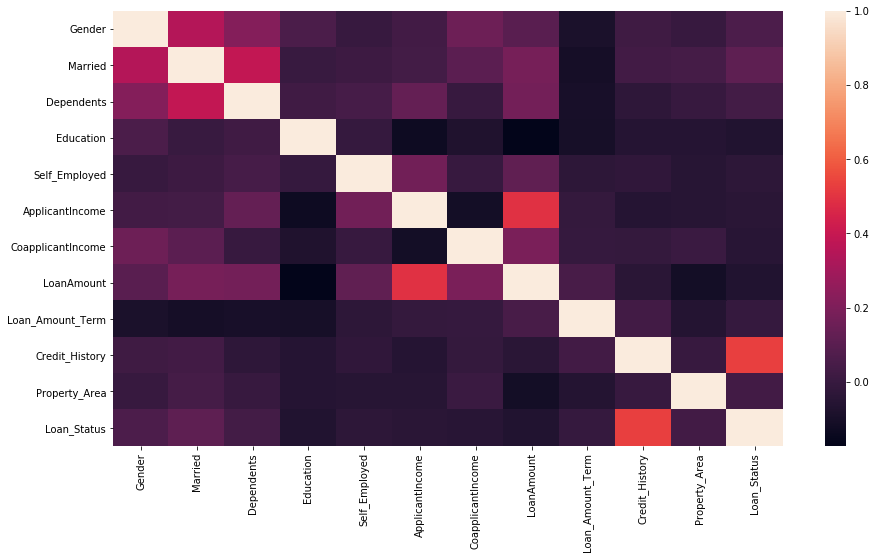

In [19]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(15,8))
sb.heatmap(data.corr())

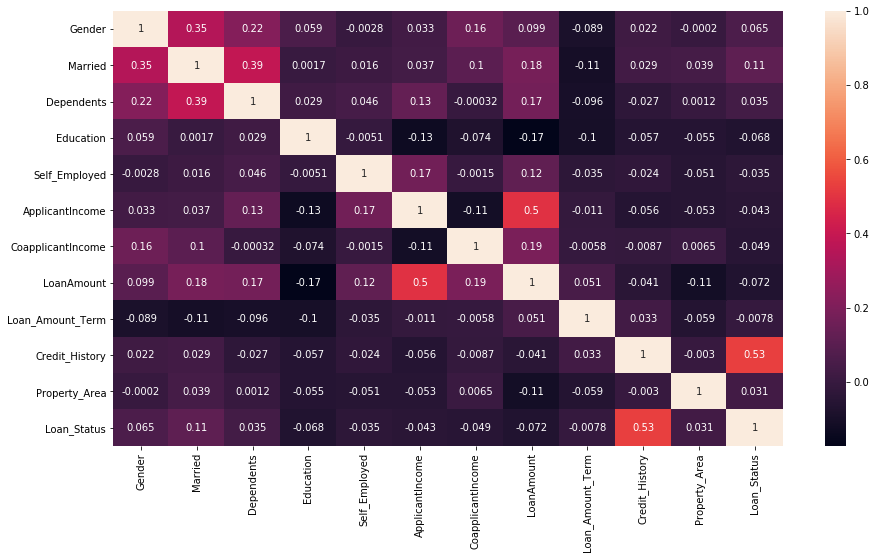

In [25]:
plt.figure(figsize=(15,8))
sb.heatmap(data.corr(),annot=True)

<Figure size 1080x576 with 0 Axes>

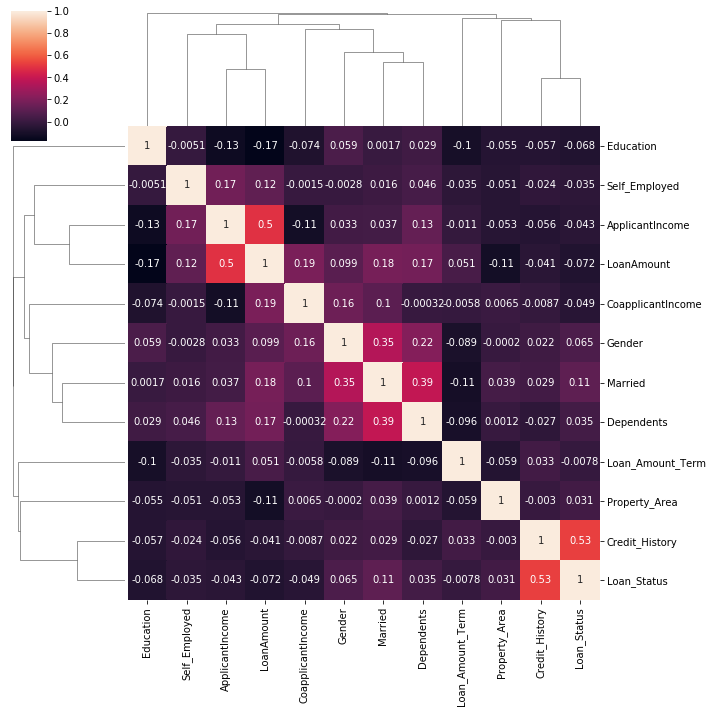

In [20]:
# This clustermap shows the Correlation between the different variables

plt.figure(figsize=(15,8))
sb.clustermap(data.corr(),annot=True)

pairwise plot of relationship with the dataset

Multivariate plotting of dataset

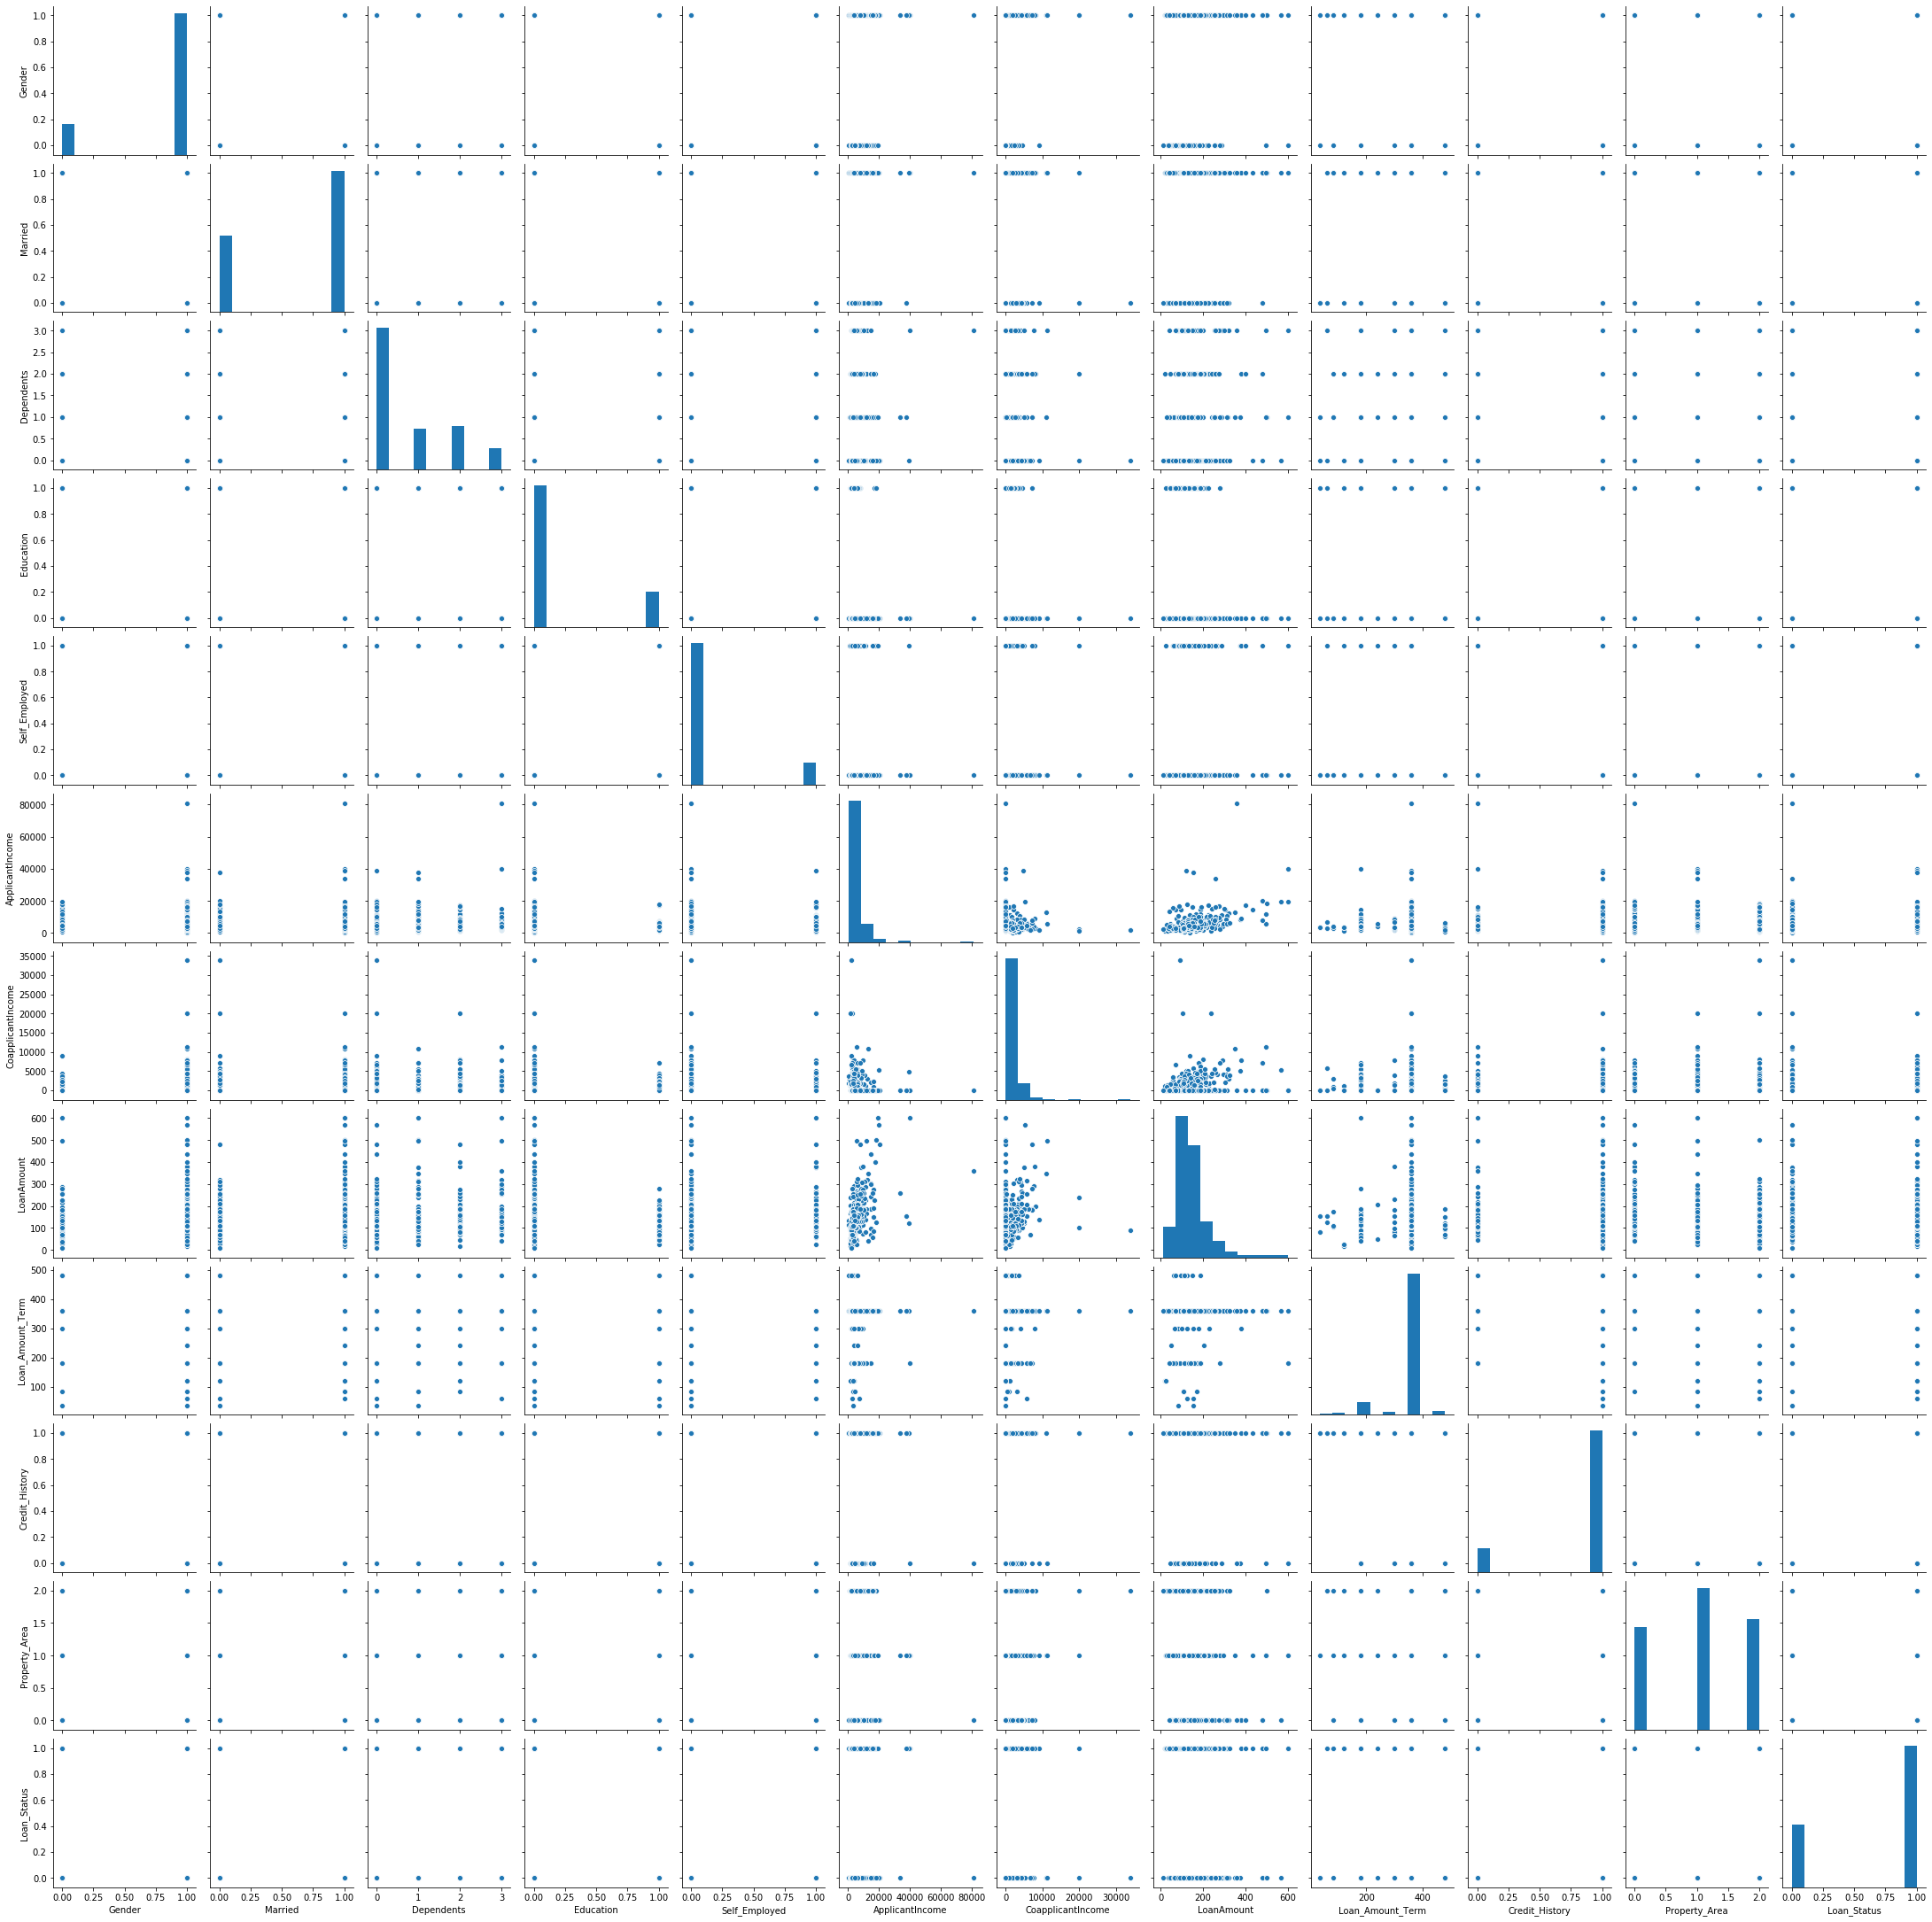

In [21]:
sb.pairplot(data)

# Model Building

Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [23]:
x=data.drop(columns=['Loan_Status','Loan_ID'])
y=data['Loan_Status']

We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=80)

In [25]:
#working on LogisticRegression 
#training and testing data using LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [26]:
print ('Accuracy score:')
print (accuracy_score(y_test,pred)*100)
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,pred))


Accuracy score:
75.0
----------------------------------------
Confusion Matrix:
[[16 27]
 [ 3 74]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.84      0.37      0.52        43
           1       0.73      0.96      0.83        77

    accuracy                           0.75       120
   macro avg       0.79      0.67      0.67       120
weighted avg       0.77      0.75      0.72       120



cross valiadtion and cross prediction

In [27]:
#cross valiadtion
score=cross_val_score(lr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(lr,x,y,cv=5)
print(predscore)

mean score : 0.7979166666666667
STD score: 0.025173012444988686

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 

In [28]:
#working on RandomForestRegressor 
#training and testing data using RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [29]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
72.5
----------------------------------------
Confusion Matrix:
[[18 25]
 [ 8 69]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.69      0.42      0.52        43
           1       0.73      0.90      0.81        77

    accuracy                           0.73       120
   macro avg       0.71      0.66      0.66       120
weighted avg       0.72      0.72      0.70       120



cross valiadtion and cross prediction

In [34]:
#cross valiadtion
score=cross_val_score(rfr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(rfr,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.24875859250150803
STD score: 0.0881786702516137

cross prediction [0.87 0.87 0.98 0.88 0.86 0.93 0.25 0.73 0.59 0.86 0.55 0.89 0.64 0.97
 0.   0.78 0.03 0.75 0.01 0.9  1.   0.74 0.79 0.93 0.84 0.98 0.43 0.95
 0.64 1.   0.78 0.82 0.98 0.72 0.89 0.05 0.89 0.94 0.95 0.83 0.88 0.03
 0.98 0.99 0.99 0.89 0.8  0.85 0.87 0.35 0.   0.96 0.1  0.67 0.65 0.22
 0.76 0.91 0.57 0.82 0.42 0.72 0.54 0.14 0.95 0.58 0.65 0.95 1.   0.49
 0.93 0.95 0.8  0.83 0.95 0.79 0.91 0.99 0.89 0.85 0.67 0.95 0.98 0.85
 0.04 0.52 0.98 0.78 0.93 0.78 0.33 0.85 0.07 0.86 0.56 0.33 0.64 0.85
 0.9  0.73 0.85 0.5  0.81 0.   0.81 0.86 0.8  0.69 1.   0.9  0.71 0.77
 0.62 0.68 0.91 0.01 0.98 0.97 0.88 0.95 0.13 0.98 0.56 0.94 0.96 0.01
 0.92 0.81 0.54 0.9  0.23 0.95 0.67 0.73 0.62 0.97 0.83 0.79 0.97 0.03
 0.67 0.6  0.82 0.94 0.6  0.28 0.91 0.41 0.72 0.7  0.52 0.93 0.93 0.76
 0.81 0.87 0.53 0.89 0.97 0.92 0.44 0.6  0.96 0.88 0.92 0.04 0.95 0.69
 0.95 0.92 0.48 0.96 0.21 1.   0.97 0.86 0.84 0.89 0.44 1.   0.83 1

In [37]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on linearRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE : 0.3
MSE : 0.3
RMSE : 0.5477225575051661


In [30]:
#working on DecisionTreeRegressor 
#training and testing data using DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [40]:
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
69.16666666666667
----------------------------------------
Confusion Matrix:
[[22 21]
 [16 61]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.58      0.51      0.54        43
           1       0.74      0.79      0.77        77

    accuracy                           0.69       120
   macro avg       0.66      0.65      0.66       120
weighted avg       0.68      0.69      0.69       120



In [33]:
#cross valiadtion
score=cross_val_score(dtr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(dtr,x,y,cv=5)
print("cross prediction",predscore)

mean score : -0.29732181483238523
STD score: 0.1716487661589542

cross prediction [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1.

In [34]:
#working on SVC 
#training and testing data using SVC

svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)

In [31]:
#Accuracy score of above module
print ('Accuracy score:')
print (accuracy_score(y_test,pred.round())*100)
print ('-'*40)
#Confusion Matrix of above module
print ('Confusion Matrix:')
print (confusion_matrix(y_test,pred.round()))
print ('-'*40)
#Classification Matrix of above module
print ('Classification Matrix:')
print (classification_report(y_test,pred.round()))

Accuracy score:
68.33333333333333
----------------------------------------
Confusion Matrix:
[[22 21]
 [17 60]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.56      0.51      0.54        43
           1       0.74      0.78      0.76        77

    accuracy                           0.68       120
   macro avg       0.65      0.65      0.65       120
weighted avg       0.68      0.68      0.68       120



In [44]:
#cross valiadtion
score=cross_val_score(svc,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(svc,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.6916666666666667
STD score: 0.00510310363079827

cross prediction [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 

GridSearchCV for the best model

In [62]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
loggscv=GridSearchCV(estimator=lr,param_grid=grid,cv=10)
loggscv.fit(x_train,y_train)
print(loggscv)
print('best score :',loggscv.best_score_)
print('best params :',loggscv.best_params_)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
best score : 0.8222222222222223
best params : {'C': 10.0, 'penalty': 'l2'}


In [66]:
# used joblib and pickle to save here we are saving LogisticRegressor model
joblib.dump(lr,'loan.pkl')

['loan.pkl']

# Conclusion


Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Exploratory data analysis and Data Preprocessing is used to prepare the data for modeling

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc

Saving the best model with joblib